# Part 1

** press on a variable, shift + F6 twice to change a variable name throughout all the file.

#### Importing the Libraries

In [1]:
import numpy as np
import matplotlib
# matplotlib.use("TkAgg")
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist   # // loading the mnist dataset is from keras not sklearn
from keras.models import Sequential
from keras.layers import Dense      # // DNN
from keras.optimizers import Adam
from keras.utils import to_categorical # // multi-classification (One Hot Encoding)

import random

#### Importing the Data/ Train Test Split

In [2]:
np.random.seed(0)

(images_train, labels_train), (images_test, labels_test) = mnist.load_data()

print("images_train.shape = ", images_train.shape)  # // images_train.shape =  (60000, 28, 28)
print("images_test.shape = ", images_test.shape)    # // images_test.shape =  (10000, 28, 28)
print("The number of labels: ", labels_train.shape[0] )

images_train.shape =  (60000, 28, 28)
images_test.shape =  (10000, 28, 28)
The number of labels:  60000


#### assert Method (ensure the imported data is accurate)

In [3]:
# // this confirms that 60k images have 60k labels, if not, the code won't run
assert(images_train.shape[0] == labels_train.shape[0] ), "The number of images isn't equal to the number of labels"

assert(images_test.shape[0] == labels_test.shape[0] ), "The number of images isn't equal to the number of labels"

assert (images_train.shape[1: ] == (28, 28) ), "The dimensions of the images are not 28x28."
assert (images_test.shape[1: ] == (28, 28) ), "The dimensions of the images are not 28x28."

In [4]:
number_of_samples = []
number_of_classes = 10
cols = 5

#### plotting samples of the MNIST Dataset

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


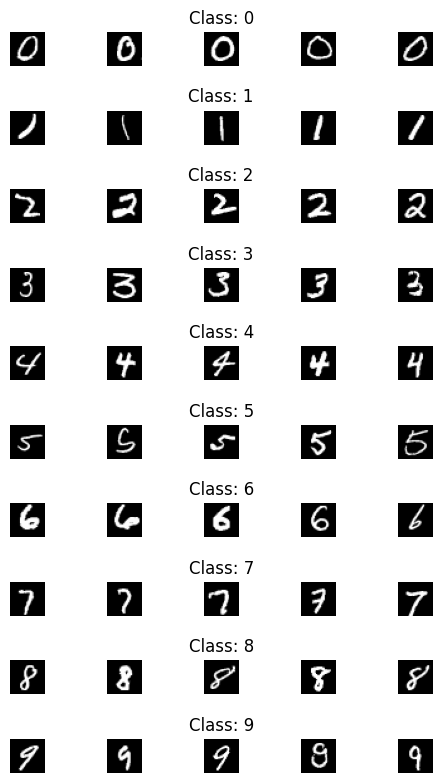

In [5]:
fig, axes = plt.subplots(nrows=number_of_classes, ncols=cols, figsize=(5, 8) )

fig.tight_layout()

for col in range(cols): # // each col of the 5
    for row in range(number_of_classes): # // each row(class) of the 10
        image_selected = images_train[labels_train == row]

        axes[row][col].imshow(image_selected[random.randint(0, len(image_selected) - 1), : , : ],
                          cmap=plt.get_cmap("gray") )

        axes[row][col].axis("off")

        if col == 2:
            axes[row][col].set_title("Class: " + str(row) )

            number_of_samples.append(len(image_selected) )

print(number_of_samples)

#### Bar plot to show the number of images each class has

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


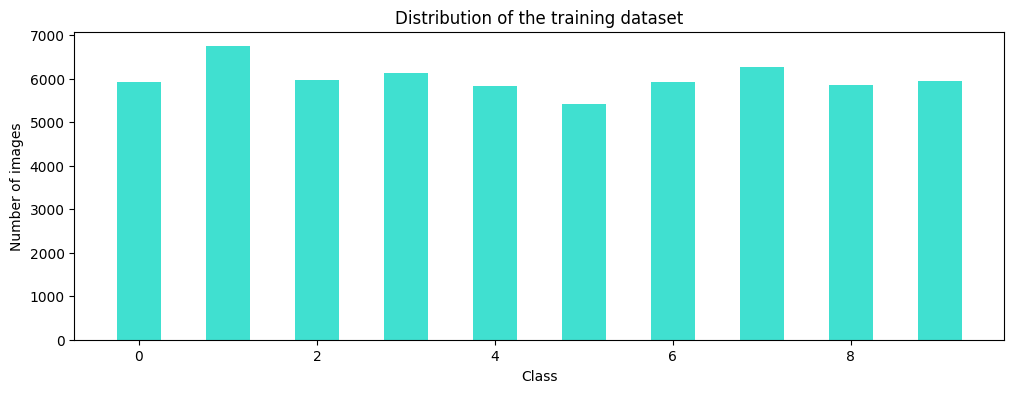

In [6]:
print(number_of_samples)
# // this shows the amount of images belonging to each class.
# // [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

# // To visualize this with a bar-plot

plt.figure(figsize=(12, 4) )
plt.bar(range(0, number_of_classes), number_of_samples, color="turquoise", width=0.5)
# // first arg is the x-coordinate (each class),
# // 2nd arg is the y-coordinate (number of images per each class)-(number_of_samples array)
# // width arg is the width of the bars.
plt.title('Distribution of the training dataset')
plt.xlabel('Class')
plt.ylabel('Number of images')

plt.show()

#### One Hot Encoding

In [7]:
labels_train_OHE = to_categorical(labels_train, 10)
labels_test_OHE = to_categorical(labels_test, 10)

#### Normalization (Feature Scaling)

In [8]:
# // here we just divide by 255
images_train_N = images_train / 255
images_test_N = images_test / 255

#### Flattening / Reshaping

In [9]:
print("images_train shape = ", images_train_N.shape) # // images_train shape = (60000, 28, 28)
print("images_test shape = ", images_test_N.shape)  # // images_test shape = (10000, 28, 28)

number_of_pixels = 28 * 28  # // 784
images_train_N = images_train_N.reshape(images_train_N.shape[0], number_of_pixels )
images_test_N = images_test_N.reshape(images_test_N.shape[0], number_of_pixels)
# // we won't change the first dim (60k), we will change the 28 x 28 to 1D of 784 (flatten it to 1D)

print("images_train new shape = ", images_train_N.shape) # // images_train shape = (60000, 784)
print("images_test new shape = ", images_test_N.shape)  # // images_test shape = (10000, 784)

images_train shape =  (60000, 28, 28)
images_test shape =  (10000, 28, 28)
images_train new shape =  (60000, 784)
images_test new shape =  (10000, 784)


___

# Part 2

#### Creating the model

In [10]:
# // It's better to use CNN for this dataset than DNN. For this section, we will use DNN
# // listen to the video when writing.

def create_NN_model(num_of_pixels_of_pictures):
    nn_model = Sequential()


    # // We won't use the softmax activation function discussed in the previous section for multi-classification
    # // Instead, we will use the "relu" activation function. Will be discussed later.
    # // here, I used input_dim instead of input_shape. It's the same
    # // the input nodes is going to be the total number of pixels. (28x28)
    # // relu is similar to sigmoid and tanh, which is a non-linear function used to
    # // convert scores into probabilities but generally performs better.

    ## 1st hidden layer
    nn_model.add(Dense(input_dim=num_of_pixels_of_pictures, units=10, activation="relu") )
    # nn_model.add(Dense(input_dim=num_of_pixels_of_pictures, units=784, activation="relu") )
    ## 2nd hidden layer
    nn_model.add(Dense(units=10, activation="relu") )
    ## output layer
    nn_model.add(Dense(units=number_of_classes, activation="softmax") )  # // used in output layer for multi-class

    nn_model.compile(optimizer=Adam(learning_rate=0.01), loss="categorical_crossentropy", metrics=['accuracy'] )

    return nn_model

# // ** In the older file I made the first layer have units=number_of_pixels (784) instead of 10
# // this increased the capacity(complexity) of the model, and greatly increased the accuracy
# // from 92-94 % to 99.8 %

#### NN model summary

In [11]:
nn_model = create_NN_model(num_of_pixels_of_pictures=number_of_pixels)

print(nn_model.summary() )

D:\coding projects\PyCharm projects\new projects\S-D-C-2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)                │      7,850 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 10)                │        110 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 10)                │        110 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 8,070 (31.52 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

None


// parameters are wights and biases.

// for the parameters between input layer and 1st hidden layer: (784 x 10) + 10 (bias values for each node)

// no. of input nodes x no. of hidden layer nodes + biases.

#### Fitting the Model

In [12]:
nn_model_fit = nn_model.fit(images_train_N, labels_train_OHE, validation_split=0.1, batch_size=200, epochs=12,
             verbose=True, shuffle=True)

# // "validation_split" arg is for the validation set, we left 10% of the training data for it.
# // This is for generalization. Check 10.3 and 10.4 sections
# // verbose and shuffle = 1 or (True)
# // I tried 20 epochs at the beginning.

Epoch 1/12
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6891 - loss: 0.9347 - val_accuracy: 0.9105 - val_loss: 0.3155
Epoch 2/12
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8938 - loss: 0.3561 - val_accuracy: 0.9245 - val_loss: 0.2644
Epoch 3/12
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9074 - loss: 0.3037 - val_accuracy: 0.9247 - val_loss: 0.2554
Epoch 4/12
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9167 - loss: 0.2785 - val_accuracy: 0.9322 - val_loss: 0.2266
Epoch 5/12
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9208 - loss: 0.2649 - val_accuracy: 0.9327 - val_loss: 0.2273
Epoch 6/12
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9233 - loss: 0.2569 - val_accuracy: 0.9323 - val_loss: 0.2212
Epoch 7/12
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9274 - loss: 0.2471 - val_accuracy: 0.9252 - val_loss: 0.2437
Epoch 8/12
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9279 - loss: 0.2409 - val_accuracy: 0.

#### saving/loading the model

In [13]:
"""

from keras.models import load_model

# // creates a HDF5 file nn_model.save('my_model.h5')  # / the hdf5 is wrong(old way)

# / creates a keras file (new way of saving)
# nn_model.save('10.2.DNN_model_MNIST_1st_layer_784units_20epochs.keras')  # // accuracy:

# // deletes the existing model
# del nn_model

# // returns a compiled model
nn_model = load_model('10-1.DNN_model_MNIST_1st_layer_10units_20epochs.keras')

"""

"\n\nfrom keras.models import load_model\n\n# // creates a HDF5 file nn_model.save('my_model.h5')  # / the hdf5 is wrong(old way)\n\n# / creates a keras file (new way of saving)\n# nn_model.save('10.2.DNN_model_MNIST_1st_layer_784units_20epochs.keras')  # // accuracy:\n\n# // deletes the existing model\n# del nn_model\n\n# // returns a compiled model\nnn_model = load_model('10-1.DNN_model_MNIST_1st_layer_10units_20epochs.keras')\n\n"

#### Plotting the history (Accuracy and Error plots) ** including the Validation

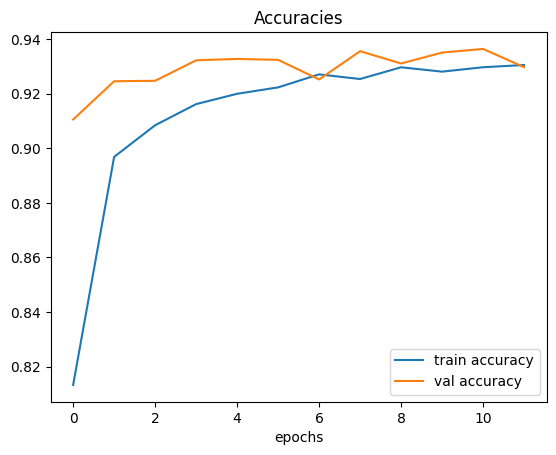

In [14]:
## Accuracy plot

acc_plot = plt.plot(nn_model_fit.history['accuracy'], label= "train accuracy" )
val_acc_plot = plt.plot(nn_model_fit.history['val_accuracy'], label="val accuracy" )

plt.xlabel('epochs')
# plt.legend(['accuracy'] )
plt.legend()
plt.title('Accuracies')
plt.show()

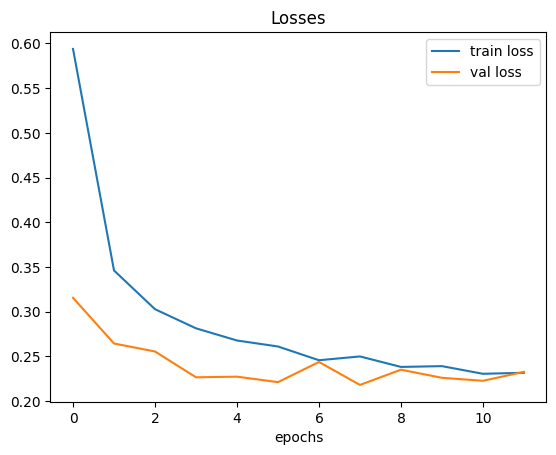

In [15]:
## Error plot

loss_plot = plt.plot(nn_model_fit.history['loss'], label = 'train loss' )
val_loss_plot = plt.plot(nn_model_fit.history['val_loss'], label='val loss')

plt.xlabel('epochs')
# plt.legend(['loss'] )
plt.legend()
plt.title('Losses')
plt.show()

#### testing the model

In [16]:
score = nn_model.evaluate(images_test_N, labels_test_OHE, verbose=0)
# // nn_model.evaluate returns a list
print(type(score) )
# // <class 'list'>

# // verbose = 0 to not show the details
print("Test loss evaluation: ", score[0])
print("Test accuracy evaluation: ", score[1])
print(score)

<class 'list'>
Test loss evaluation:  0.26426970958709717
Test accuracy evaluation:  0.9229999780654907
[0.26426970958709717, 0.9229999780654907]


In [17]:
# // with CNN, we can easily reach 98 or 99% accuracy
# // another advantage of CNN is how much efficient they are at classifying much larger and colorful images.

___

# Part 3

#### Plotting the url MNIST Image

<Response [200]>


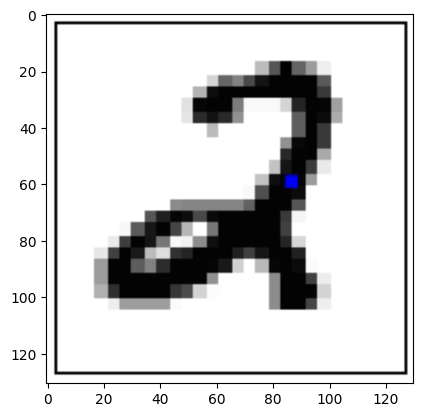

In [18]:
import requests
from PIL import Image   # // Python Imaging Library

# // a link for a MNIST photo of 2
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'

# // this will take the url of the image.
# // stream arg = True so that the request doesn't download the entire image into memory
response = requests.get(url, stream=True)
print(response)  # -> <Response [200]>
# // this means it returns 200 which is a signal that there is a response
# // we can now use the raw content of the response to obtain the image

image = Image.open(response.raw)
plt.imshow(image)

#### Manipulating the image to suit our NN Model

In [19]:
import cv2

## Convert the image to array
image_array = np.asarray(image)
# // this function wasn't discussed before, what it simply does is convert our data into an array
print("image_array shape: ", image_array.shape)   # -> image_array shape: (131, 130, 3)

image_array shape:  (131, 130, 3)


In [20]:
## Resize the image
# // we need to resize it to 28x28, because our NN was trained on 28x28 images
image_resized = cv2.resize(image_array, (28, 28) )
print(image_resized.shape)  # -> (28, 28, 3)

(28, 28, 3)


(28, 28)


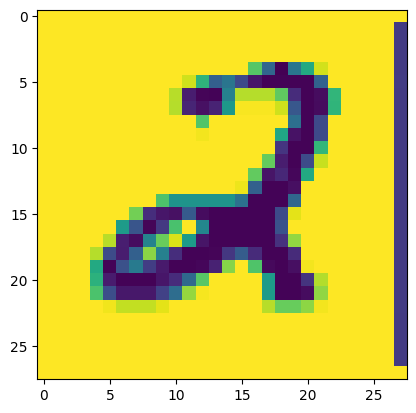

In [21]:
## Convert image to Gray-Scale
# // we need to convert it to grayscale,
# // to lower the complexity and resources consumed and also because of the upper reason.
image_resized_GS = cv2.cvtColor(image_resized, cv2.COLOR_RGB2GRAY)  # // BGR is the same as RGB
# // convert color is the name of the function
print(image_resized_GS.shape)  # -> (28, 28)
plt.imshow(image_resized_GS)
# // so now the image has become 2D

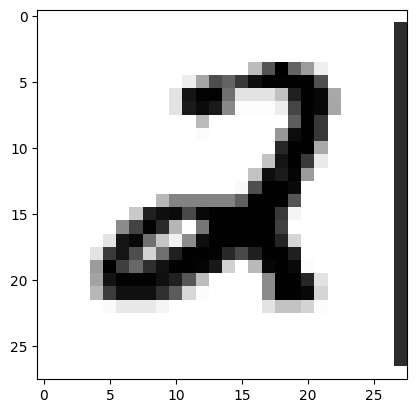

In [22]:
# // pic 2 is like that, because of the default colormap of matplotlib being that color.
plt.imshow(image_resized_GS, cmap=plt.get_cmap("gray") )

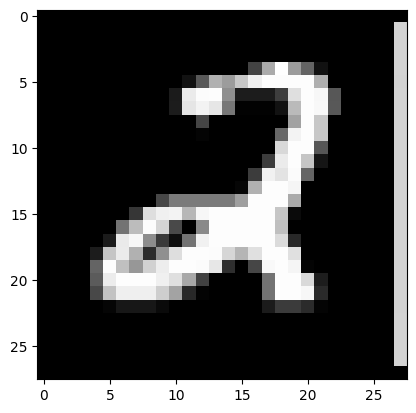

In [23]:
## Changing the look of the image
# // There is a new problem, the NN was trained on images with white numbers and black background.
# // to solve this, we use the function "bitwise_not"
# // what's that going to do is every 0 pixel value will be 255 and vice versa.
# // basically entering the pixels through a Not gate like situation.
image_resized_GS_bit = cv2.bitwise_not(image_resized_GS)
plt.imshow(image_resized_GS_bit, cmap=plt.get_cmap("gray") )

#### doing the same manipulation we did to the images trained

In [24]:
image_resized_GS_bit_N = image_resized_GS_bit / 255
image_resized_GS_bit_N = image_resized_GS_bit_N.reshape(1, 784)  # // 1 row and 784 cols
# // 'resize' is different from 'reshape'.

In [25]:
print(image_resized_GS_bit_N)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.82352941 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.82352941
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.      

#### model's prediction

In [26]:
# // ** model.predict_classes in the video doesn't work anymore instead
nn_model_class_prediction = np.argmax(nn_model.predict(image_resized_GS_bit_N), axis=1)
print("Model's prediction for the class: " + str(nn_model_class_prediction) )
# -> Model's prediction for the class: [2]
# !! print(nn_model.predict(image_resized_GS_bit_N) )
# !! print(nn_model.predict_classes(image_resized_GS_bit_N) )
# -> Error:Sequential model has no attribute predict_classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Model's prediction for the class: [2]
